# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
concrete_slump_data = pd.read_csv("cement_slump.csv")
df = concrete_slump_data.copy()
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [3]:
df.shape

(103, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [8]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [9]:
for i in df.drop(columns ="Compressive Strength (28-day)(Mpa)"):
    print(f"corr between Compressive Strength (28-day)(Mpa)  and {i:<12}:  {df['Compressive Strength (28-day)(Mpa)'].corr(df[i])}") 

corr between Compressive Strength (28-day)(Mpa)  and Cement      :  0.445656142563621
corr between Compressive Strength (28-day)(Mpa)  and Slag        :  -0.33152226429150117
corr between Compressive Strength (28-day)(Mpa)  and Fly ash     :  0.44437968506874465
corr between Compressive Strength (28-day)(Mpa)  and Water       :  -0.2543201492378115
corr between Compressive Strength (28-day)(Mpa)  and SP          :  -0.037909280335955774
corr between Compressive Strength (28-day)(Mpa)  and Coarse Aggr.:  -0.16060986575287395
corr between Compressive Strength (28-day)(Mpa)  and Fine Aggr.  :  -0.15453179659662755
corr between Compressive Strength (28-day)(Mpa)  and SLUMP(cm)   :  -0.2234993688009328
corr between Compressive Strength (28-day)(Mpa)  and FLOW(cm)    :  -0.12418851574647044


In [10]:
for i in df.drop(columns ="SLUMP(cm)"):
    print(f"corr between SLUMP(cm) and {i:<12}:  {df['SLUMP(cm)'].corr(df[i])}")

corr between SLUMP(cm) and Cement      :  0.14591250347446058
corr between SLUMP(cm) and Slag        :  -0.2840365645465272
corr between SLUMP(cm) and Fly ash     :  -0.11862136427736544
corr between SLUMP(cm) and Water       :  0.4665682704665741
corr between SLUMP(cm) and SP          :  -0.21290187179820189
corr between SLUMP(cm) and Coarse Aggr.:  -0.18815710569104308
corr between SLUMP(cm) and Fine Aggr.  :  0.20227220755596165
corr between SLUMP(cm) and FLOW(cm)    :  0.9061345366873963
corr between SLUMP(cm) and Compressive Strength (28-day)(Mpa):  -0.2234993688009328


In [11]:
for i in df.drop(columns ="FLOW(cm)"):
    print(f"corr between FLOW(cm)  and {i:<12}:  {df['FLOW(cm)'].corr(df[i])}")

corr between FLOW(cm)  and Cement      :  0.18646060166963524
corr between FLOW(cm)  and Slag        :  -0.32723069068960814
corr between FLOW(cm)  and Fly ash     :  -0.05542345861329105
corr between FLOW(cm)  and Water       :  0.6320256741040274
corr between FLOW(cm)  and SP          :  -0.17631448989021709
corr between FLOW(cm)  and Coarse Aggr.:  -0.3257866931273848
corr between FLOW(cm)  and Fine Aggr.  :  0.1903695911784868
corr between FLOW(cm)  and SLUMP(cm)   :  0.9061345366873963
corr between FLOW(cm)  and Compressive Strength (28-day)(Mpa):  -0.12418851574647044


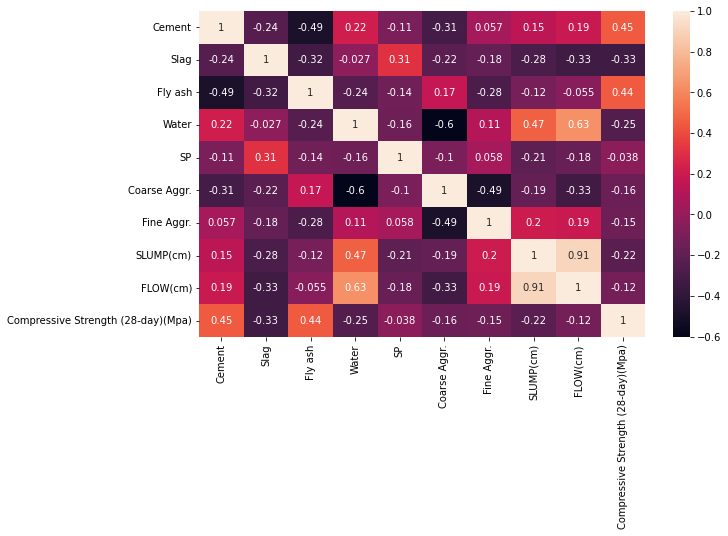

In [12]:
sns.heatmap(df.corr(), annot = True);

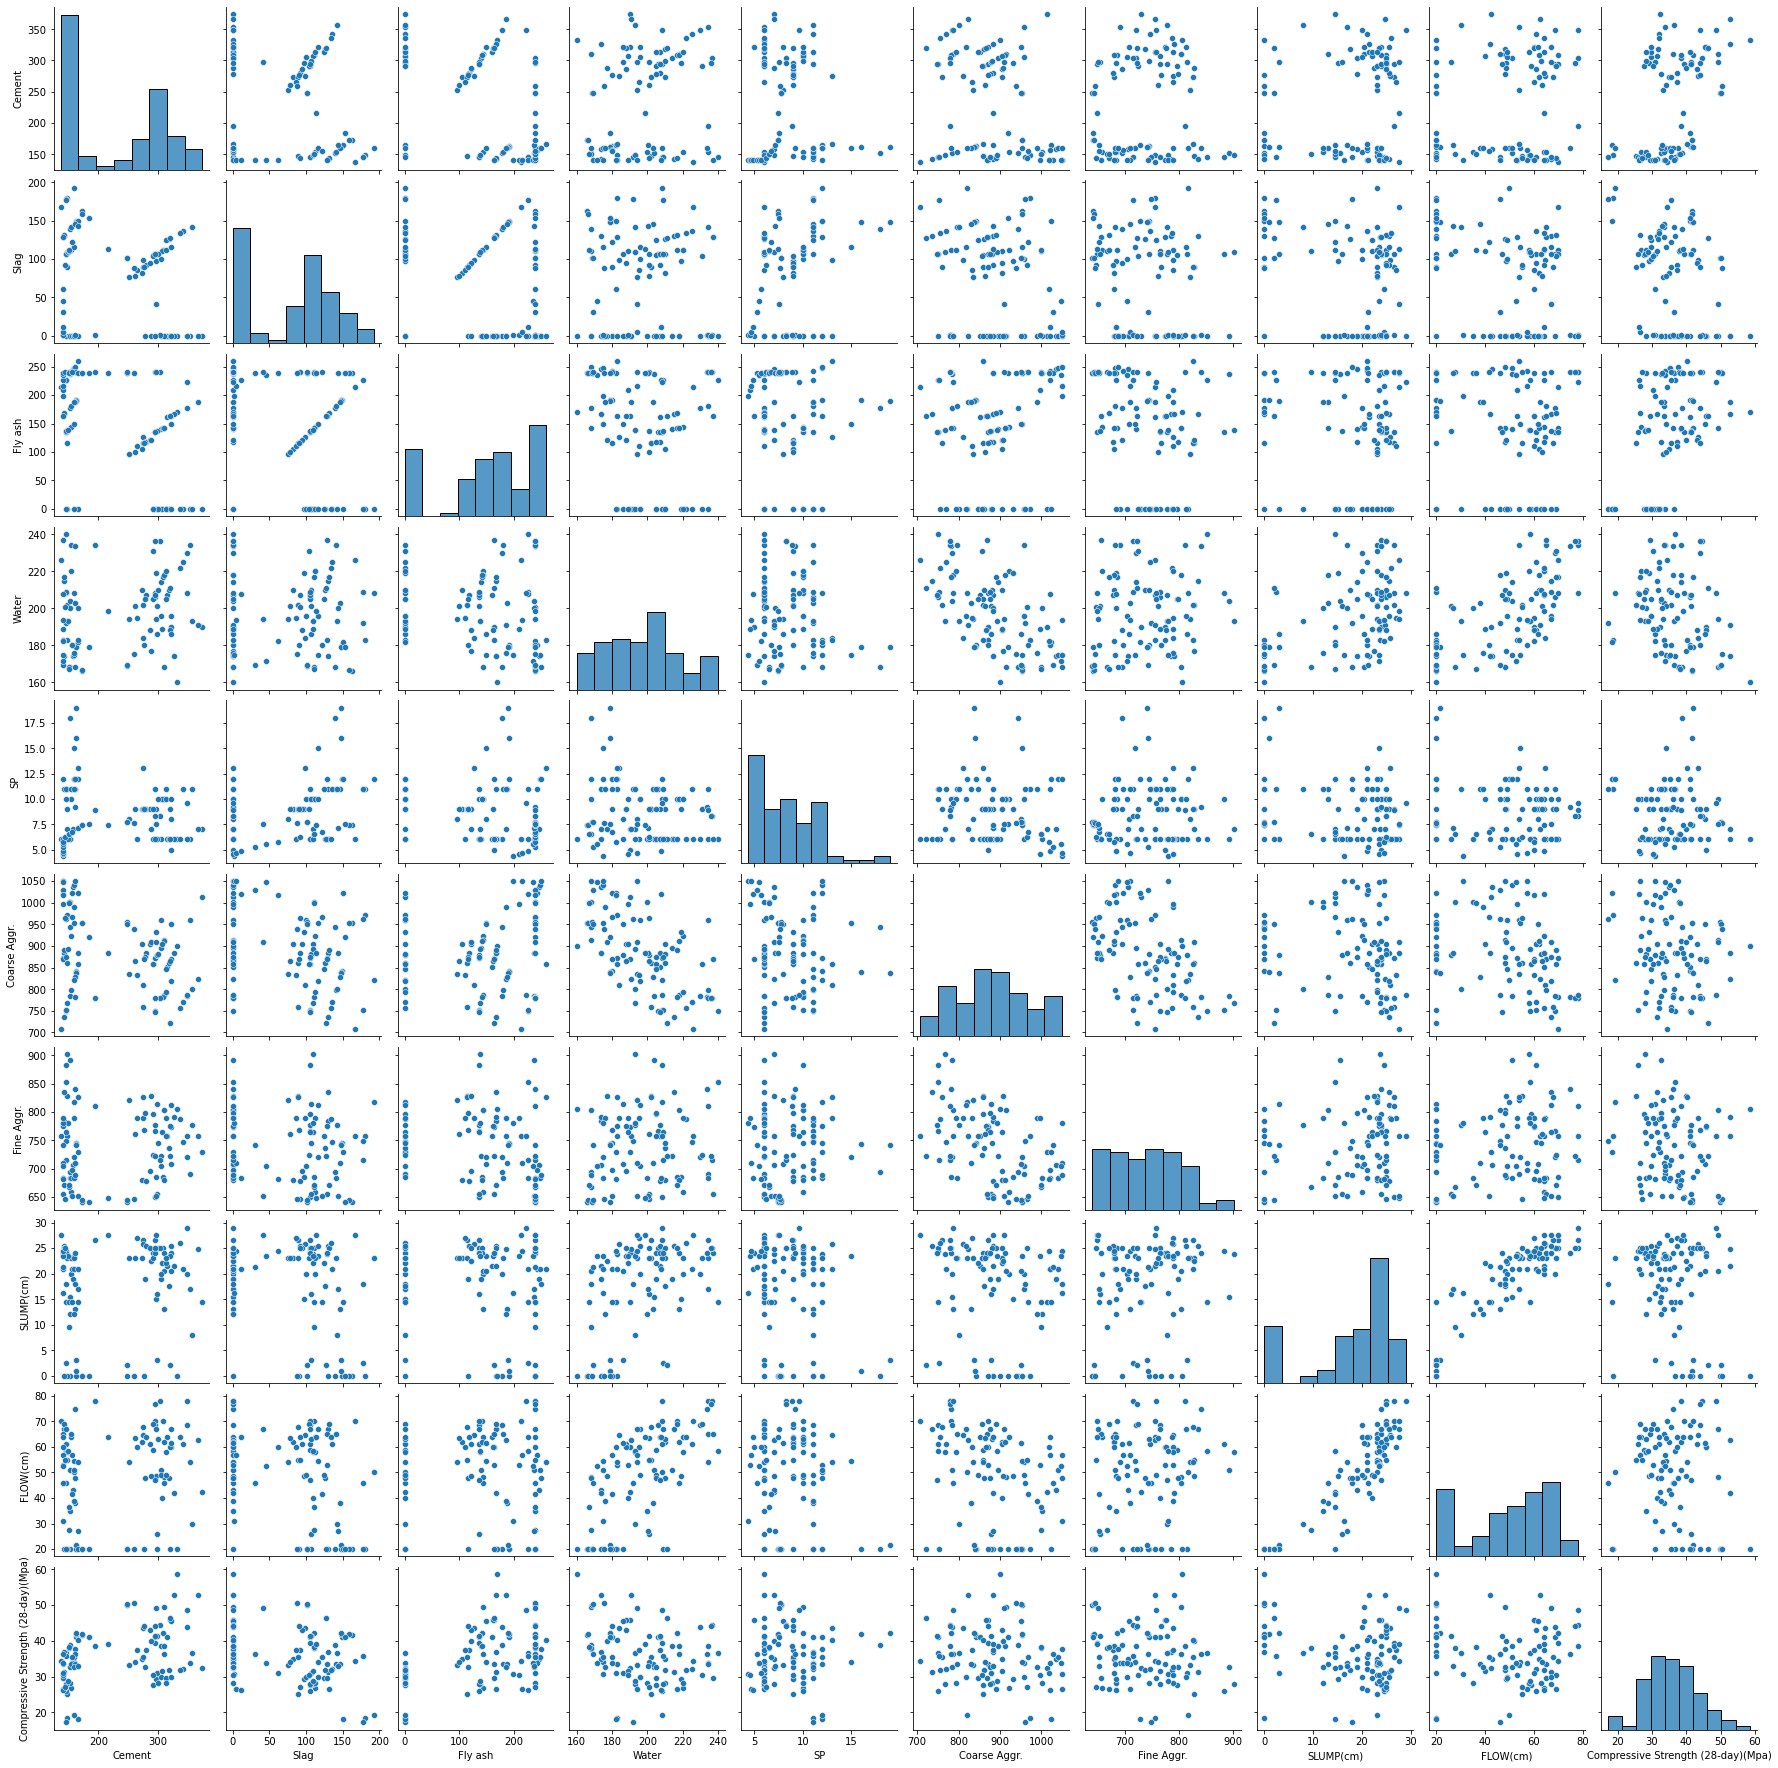

In [13]:
sns.pairplot(df);

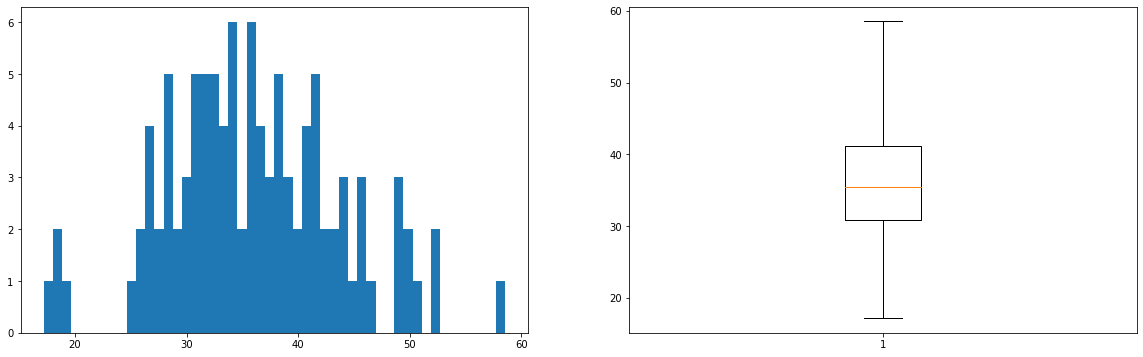

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["Compressive Strength (28-day)(Mpa)"], bins=50)

plt.subplot(122)
plt.boxplot(df["Compressive Strength (28-day)(Mpa)"], whis=2.5)

plt.show()

# Data Preprocessing 

### Features and target variable

In [15]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)") 
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [19]:
df.sample(11)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
76,159.000,0.000,187.000,176.000,11.000,990.000,789.000,12.000,39.000,32.570
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
41,154.000,141.000,181.000,234.000,11.000,797.000,683.000,23.000,65.000,33.510
72,322.000,116.000,0.000,196.000,10.000,818.000,813.000,25.500,67.000,29.770
50,320.000,0.000,163.000,188.000,9.000,866.000,776.000,23.500,60.000,45.690
87,194.300,0.300,240.000,234.200,8.900,780.600,811.300,26.500,78.000,38.460
82,160.200,0.300,240.000,233.500,9.200,781.000,841.100,24.000,75.000,36.190
5,147.000,89.000,115.000,202.000,9.000,860.000,829.000,23.000,55.000,25.210
29,314.000,0.000,161.000,207.000,6.000,851.000,757.000,21.500,64.000,41.140


In [20]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


In [21]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000
55,159.000,193.000,0.000,208.000,12.000,821.000,818.000,23.000,50.000
28,298.000,107.000,137.000,201.000,6.000,878.000,655.000,16.000,26.000
64,265.000,86.000,111.000,195.000,6.000,833.000,790.000,27.000,60.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


In [22]:
X_test

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
30,321.000,0.000,164.000,190.000,5.000,870.000,774.000,24.000,60.000
67,166.000,0.000,260.000,183.000,13.000,859.000,827.000,21.000,54.000
62,299.000,107.000,0.000,210.000,10.000,881.000,745.000,25.000,63.000
47,287.000,94.000,121.000,188.000,9.000,904.000,696.000,25.000,61.000
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000
40,145.000,177.000,227.000,209.000,11.000,752.000,715.000,2.500,20.000
90,155.400,122.100,240.000,179.900,6.700,966.800,652.500,14.500,41.500
45,318.000,126.000,0.000,210.000,6.000,861.000,737.000,17.500,48.000
10,145.000,106.000,136.000,208.000,10.000,751.000,883.000,24.500,61.000
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000


In [23]:
y_test

30    45.820
67    40.340
62    28.290
47    43.010
42    33.510
40    35.660
90    35.520
45    31.770
10    26.020
0     34.990
18    49.300
31    43.950
97    44.080
85    30.970
76    32.570
4     26.820
79    30.430
33    35.520
12    31.370
26    42.080
100   50.500
53    38.590
22    18.520
68    46.360
44    30.970
98    49.970
15    34.050
73    41.270
39    33.780
9     38.460
84    33.780
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [25]:
# BU FORMÜL GRAFİKLERİ AYRI AYRI ÇIKARTIYOR

# def plot_relation(df, target_var):
#     num_cols = df.columns
#     for col in num_cols:
#         if col != target_var:
#             plt.figure()
#             sns.lmplot(x=col, y=target_var, data=df, height=7)
#             plt.xlabel(f"variable name: {col}")
#             plt.ylabel("Compressive Strength (28-day)(Mpa)")

# plot_relation(df,"Compressive Strength (28-day)(Mpa)" )

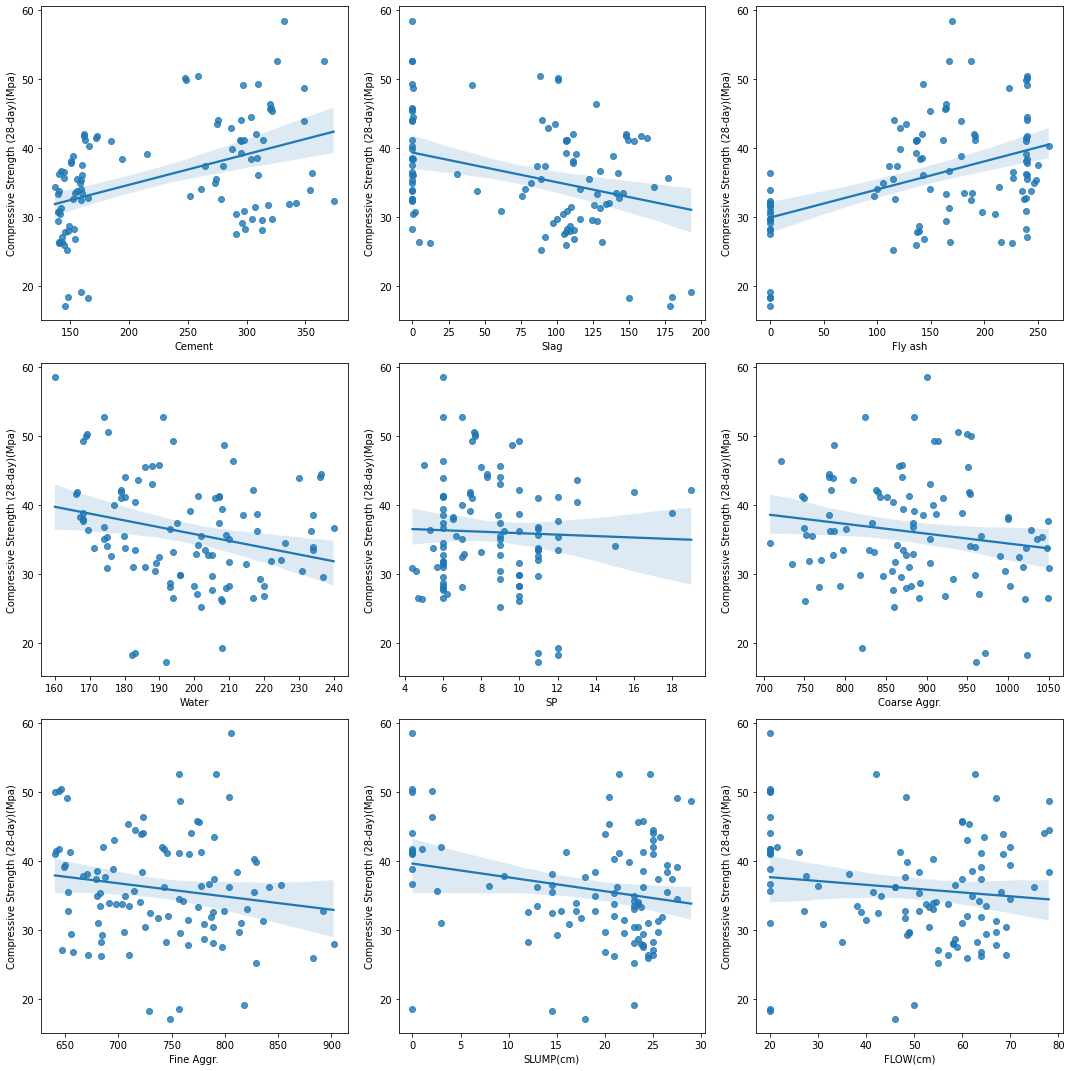

In [27]:
# Grafikleri bir arada gösterme, üstteki sns.lmplot yerine regplot kullanıldı
def plot_relation(df, target_var):
    subp = 331
    plt.figure(figsize=([15,15]))
    for col in df.columns:
        if col != target_var:
            plt.subplot(subp)
            sns.regplot(x=col, y=target_var, data=df)
            subp += 1
    plt.tight_layout()

plot_relation(df,"Compressive Strength (28-day)(Mpa)")

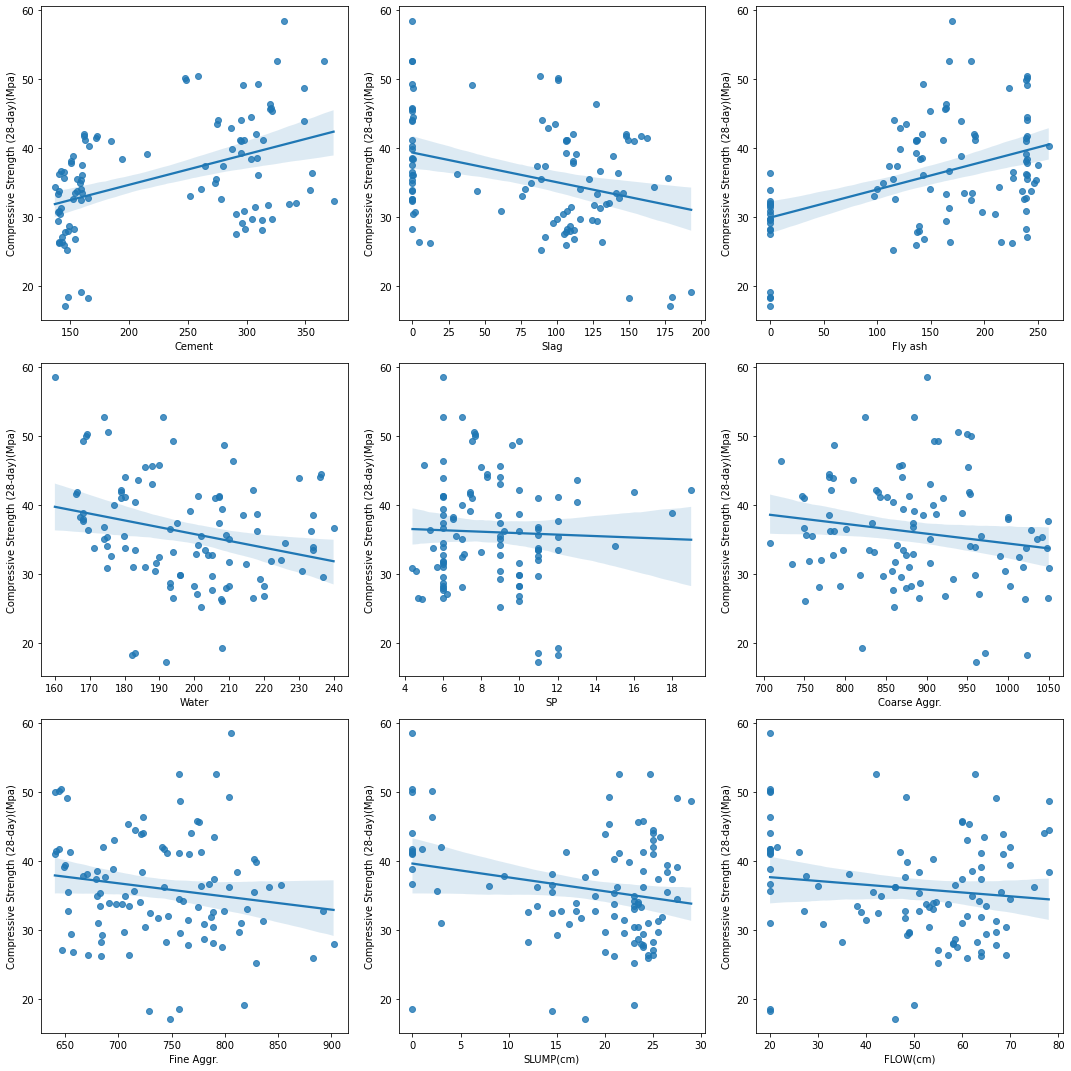

In [29]:
# Grafikleri bir arada gösterme, üstteki sns.lmplot yerine regplot kullanıldı, ikinci bir yöntem
def plot_relation2(df, target_var):
    f, axs = plt.subplots(3,3,figsize=(15,15))
    c = 0
    for i in range(3):
        for j in range(3):
            if df.columns[c] != target_var:
                sns.regplot(x=df.columns[c], y=target_var, data=df, ax=axs[i][j])
            c += 1
    plt.tight_layout()

plot_relation2(df,"Compressive Strength (28-day)(Mpa)")

In [31]:
# 3. yöntem, burada da prametre olarak figürün shape'ini ve boyutunu fonksiyonu çağırırken belirleyebiliriz, yani 
# kolayca kopyala yapıştır yapıp başka projelerde kullanabiliriz, sadece geçerli bir shape girmek gerek
# def plot_relation3(df, target_var, shape, figsize=(15,15)):
#     f, axs = plt.subplots(shape[0], shape[1], figsize=figsize)
#     c = 0
#     for i in range(shape[0]):
#         for j in range(shape[1]):
#             if df.columns[c] != target_var:
#                 sns.regplot(x=df.columns[c], y=target_var, data=df, ax=axs[i][j])
#             c += 1
#     plt.tight_layout()

# plot_relation3(df,"Compressive Strength (28-day)(Mpa)")

## Scaling

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
# Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[-1.01867817e+00,  4.89060387e-01, -7.01085388e-02,
        -1.99267756e-01, -5.39878038e-01, -1.37532719e+00,
         2.52572977e+00,  6.48505379e-01,  4.82444362e-01],
       [ 8.52113706e-01, -6.26114653e-01,  1.06779252e+00,
        -1.50862633e-01, -3.67117066e-01,  2.75612237e-01,
        -1.40263561e+00,  1.08244950e+00,  9.92185022e-01],
       [-8.80658652e-01,  1.86460669e+00, -1.63768284e+00,
         5.26809088e-01,  1.18773168e+00, -7.54320879e-01,
         1.20685410e+00,  5.61716555e-01,  2.93415534e-02],
       [ 8.63406212e-01,  4.56309284e-01, -9.26635646e-02,
         1.87973228e-01, -8.85399982e-01, -8.64461622e-02,
        -1.35239273e+00, -2.48312469e-01, -1.32996687e+00],
       [ 4.49347647e-01,  1.12422708e-01, -3.85878901e-01,
        -1.02457510e-01, -8.85399982e-01, -6.13715675e-01,
         7.67228879e-01,  1.02459028e+00,  5.95720064e-01],
       [-1.03122540e+00,  1.61549362e-01, -3.40768849e-01,
         2.36378351e-01,  1.51165851e-01, -2.973539

In [35]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.15199248, -1.2958747 ,  0.21182928, -0.34448313, -1.23092193,
        -0.18018296,  0.51601447,  0.67743499,  0.59572006],
       [-0.79282805, -1.2958747 ,  1.29447053, -0.68331899,  1.53325363,
        -0.30907107,  1.34816221,  0.33027969,  0.25589296],
       [ 0.87595344,  0.45630928, -1.63768284,  0.62361933,  0.49668779,
        -0.05129486,  0.06068834,  0.79315342,  0.76563362],
       [ 0.72538669,  0.24342712, -0.27310377, -0.44129337,  0.15116585,
         0.21819845, -0.7086558 ,  0.79315342,  0.65235792],
       [-0.86811142,  1.09495578,  0.4824896 ,  0.28478347,  0.84220974,
        -0.66058408, -0.48884319, -0.59546776, -0.65031266],
       [-1.05631986,  1.60259787,  0.9223126 ,  0.57521421,  0.84220974,
        -1.5628008 , -0.41033868, -1.8105113 , -1.66979398],
       [-0.92582868,  0.70358011,  1.06892027, -0.83337487, -0.64353462,
         0.95403234, -1.39164498, -0.42189012, -0.45208018],
       [ 1.1143508 ,  0.76744476, -1.63768284,  0.62361933, -0

In [36]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() 

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [37]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [38]:
# y_pred = b1X + b0
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [39]:
model_poly = LinearRegression()

### 1.1 Interpret the model

In [40]:
model_poly.fit(X_train_scaled, y_train)

LinearRegression()

### 1.2 Model Evaluation

In [41]:
y_pred = model_poly.predict(X_test_scaled)
y_train_pred = model_poly.predict(X_train_scaled)

In [42]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
30,45.820,44.943,0.877
67,40.340,41.169,-0.829
62,28.290,28.563,-0.273
47,43.010,39.211,3.799
42,33.510,35.282,-1.772
40,35.660,39.457,-3.797
90,35.520,37.252,-1.732
45,31.770,31.227,0.543
10,26.020,28.770,-2.750
0,34.990,34.480,0.510


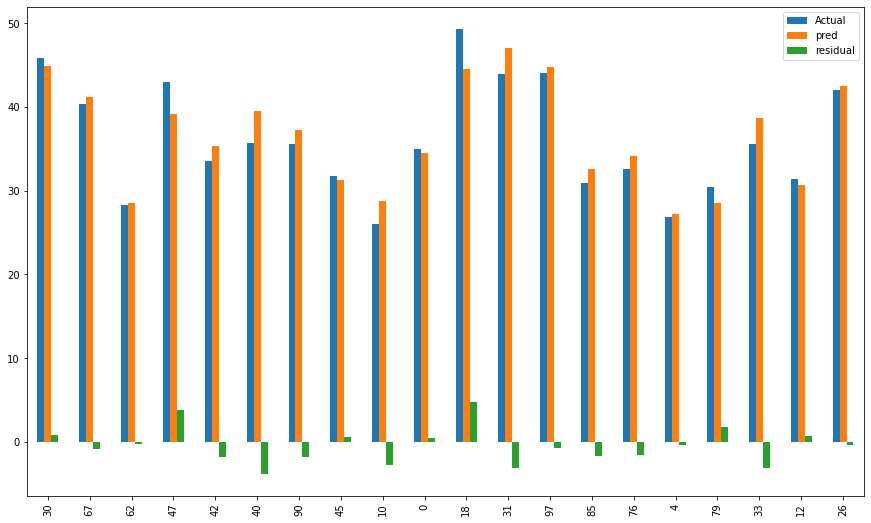

In [43]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [44]:
model_poly.coef_

array([ 3.73690789, -2.84833966,  3.20875858, -5.16495691, -0.05694117,
       -5.83872896, -3.18557505, -2.41794917,  1.51351431])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [46]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


# 2. Regularization

In [47]:
from sklearn.linear_model import RidgeCV, LassoCV

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [52]:
enet = ElasticNet().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet.predict(X_test))))
enet_cv = ElasticNetCV(cv = 10, random_state=1).fit(X_train, y_train)
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet_tuned.predict(X_test))))

2.09597225948599
2.1259283050278315


In [53]:
lr = LinearRegression()

lr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, lr.predict(X_test_scaled)))

TRAIN:  1.9919336865776538
TEST :  1.7157819342821758


## 2.1 Ridge (Apply and evaluate)

In [54]:
y_train

11    28.030
101   49.170
55    19.190
28    41.270
64    37.390
       ...  
71    28.160
14    32.440
92    44.480
51    32.040
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 72, dtype: float64

In [55]:
rr = RidgeCV()

rr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, rr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, rr.predict(X_test_scaled)))

TRAIN:  2.0026012518839167
TEST :  1.6989156334829212


## 2.2 Lasso (Apply and evalute)

In [56]:
lsr = LassoCV()

lsr.fit(X_train_scaled,y_train)

print("TRAIN: ", mean_absolute_error(y_train, lsr.predict(X_train_scaled)))
print("TEST : ", mean_absolute_error(y_test, lsr.predict(X_test_scaled)))

TRAIN:  1.9975760206857491
TEST :  1.6891080373429999


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [57]:
# elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
# elastic_model.fit(X_train_scaled, y_train)
# 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 This parameter can be a list, 
# in which case the different values are tested by cross-validation and the one giving the best prediction score is used. 
# Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) 
# and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [60]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [61]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [62]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [63]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [64]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004,0.000,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.652,-3.060,-1.837,-3.328,-2.678,-2.711,0.504,1
1,0.003,0.000,0.001,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.642,-3.073,-1.832,-3.335,-2.680,-2.713,0.510,3
2,0.004,0.000,0.001,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.640,-3.080,-1.831,-3.342,-2.682,-2.715,0.513,5
3,0.004,0.001,0.001,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.640,-3.089,-1.831,-3.352,-2.684,-2.719,0.517,7
4,0.003,0.001,0.001,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.642,-3.091,-1.831,-3.354,-2.684,-2.720,0.517,9
5,0.004,0.001,0.001,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.644,-3.094,-1.832,-3.357,-2.684,-2.722,0.518,11
6,0.004,0.001,0.001,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.645,-3.094,-1.832,-3.358,-2.685,-2.723,0.518,12
7,0.003,0.000,0.001,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.658,-3.053,-1.840,-3.330,-2.678,-2.712,0.502,2
8,0.004,0.001,0.001,0.001,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.646,-3.068,-1.834,-3.338,-2.679,-2.713,0.509,4
9,0.004,0.000,0.001,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.641,-3.076,-1.833,-3.345,-2.681,-2.715,0.512,6


In [65]:
grid_model.best_index_

0

In [66]:
grid_model.best_score_

-2.7110491569224244

In [67]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [71]:
gri = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gri

,GridSearch_train,GridSearch_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [72]:
pd.concat([ls, gri], axis=1)

,linear_train,linear_test,GridSearch_train,GridSearch_test
R2,0.900,0.921,0.899,0.923
mae,1.992,1.716,2.001,1.693
mse,6.237,4.439,6.287,4.367
rmse,2.497,2.107,2.507,2.090
